## Equação 1

$$\frac{\varepsilon(\rho_0)}{\rho_0} - M + B_0 = 0$$

## Equação 2

$$A(\rho) = \frac{a}{(1+b \rho)^n}$$

## Equação 3

$$B(\rho) = \frac{1}{\rho} - \frac{1}{\rho} \cdot \exp\left[ -\frac{\left( 4 - \frac{3 b \rho}{4}\right)\frac{3 b \rho}{4}}{\left( 1 - \frac{3 b \rho}{4}\right)^2}\right]$$

**O sistema é:**

$$\left\{\begin{aligned}
\varepsilon(\rho_0) / \rho_0 - M + B_0 &= 0 \\
P(\rho_0) &= 0 \\
K(\rho_0) - K_0 &= 0
\end{aligned}\right.$$

As variáveis são

$$\vec{x} = 
\begin{bmatrix}
a \\
b \\
n \\
\end{bmatrix}$$

Os parâmetros são $\rho_0$, $K_0$, $B_0$ e $M$

In [790]:
using Symbolics

@variables ρ a b n γ ρ_p ρ_n

ħ_c = 197.33 # MeV.fm
M = 938 #MeV
ρ₀= 0.16#347 ##fm^-3 #(ħ_c)^3 #MeV^3 
B₀ = 16 #MeV
K₀ = 250 #MeV
γ₀ = 4 #Adimensional

4

In [791]:
A = a / (1 + b * ρ)^n;

In [792]:
B = (1/ρ) - (1/ρ) * exp((((-1*b*ρ/4)*(4-((3*b*ρ)/4)))/(1-((b*ρ)/4))^2));

In [793]:
ρ_star = ρ /(1-B*ρ);

In [794]:
ρ_p = ρ/2;  
ρ_n = ρ/2;

ρ_star_prot = ρ_p/(1 -B*ρ);
ρ_star_neut = ρ_n/(1 -B*ρ);

In [795]:
kf_star = ((6*acos(-1)^2*ρ_star)/γ)^((1/3));
kf_star_prot = ((6.0*acos(-1)^2*ρ_star_prot)/2.0)^((1/3));
kf_star_neut = ((6.0*acos(-1)^2*ρ_star_neut)/2.0)^((1/3));

In [814]:
#ε_star =(γ /(16*π^2))*( (2*kf_star^3 + kf_star*M^2)*hypot(kf_star, M) - M^4 * asinh(kf_star/M))
ε_star = (γ /(16*acos(-1)^2))*((sqrt(kf_star^2+ M^2)*kf_star*(2*kf_star^2+M^2)) + M^4*log(M/(sqrt(kf_star^2+ M^2)+kf_star)));

ε_star_prot = (2 /(16*acos(-1)^2))*((sqrt(kf_star_prot^2+ M^2)*kf_star_prot*(2*kf_star_prot^2+M^2)) + M^4*log(M/(sqrt(kf_star_prot^2+ M^2)+kf_star_prot)));
ε_star_neut = (2 /(16*acos(-1)^2))*((sqrt(kf_star_neut^2+ M^2)*kf_star_neut*(2*kf_star_neut^2+M^2)) + M^4*log(M/(sqrt(kf_star_neut^2+ M^2)+kf_star_neut)));

In [833]:
x_f_prot = (ħ_c*kf_star_prot)/M;
x_f_neut = (ħ_c*kf_star_neut)/M;
axf_prot = sqrt(x_f_prot^2+1);
axf_neut = sqrt(x_f_neut^2+1);
R_prot = (1/8)*(2*x_f_prot*axf_prot^3-x_f_prot*axf_prot+log(1/(x_f_prot+axf_prot)));
R_neut = (1/8)*(2*x_f_neut*axf_neut^3-x_f_neut*axf_neut+log(1/(x_f_neut+axf_neut)));
ε_star_prof = (M^4*2)/(2*acos(-1)^2)*(R_neut+R_prot);

In [834]:
ε = (1 - B*ρ) * ε_star - A * ρ^2;
ε_geral = (1 - B*ρ) * (ε_star_prot+ε_star_neut) - A * ρ^2;

In [835]:
P_star = (γ/(48*π^2))*( (2*kf_star^3 - 3*kf_star*M^2)*hypot(kf_star, M) + 3*M^4*asinh(kf_star/M));


In [836]:
Dρ = Differential(ρ)
Σ = Dρ(B) * ρ * P_star - Dρ(A) * ρ^2;

In [837]:
P = ρ^2 * Dρ(ε/ρ)  #P_star - (A * ρ^2) + (ρ * Σ); #ρ^2 * Dρ(ε/ρ) TODO: why is the symbolic differentiation not working?

In [838]:
K_id_star = 3 * kf_star^2 / hypot(kf_star, M);

In [839]:
K = 9 * Dρ(P);

In [851]:
# Outputs of F(X)

y1 = ε/ρ - M ; ##+ B₀;
y2 = P;
y3 = K - K₀;
y4 = A;
y5 = B;
y6 = ρ_star;
y7 = ε_star;
y8 = ε_star_prot+ε_star_neut;
y9 = ε_star_prof/(ħ_c^3);
y10 = (1 - B*ρ)*191.237765 - A * ρ^2 ; #epsilon #191.237765
y11 = (1 - B*ρ)*(ε_star_prot+ε_star_neut) - A * ρ^2 ;


In [852]:
F_symb = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11];

In [853]:
#TODO
F_symb = expand_derivatives.(F_symb)
f_expr = build_function(F_symb, [a, b, n, ρ, γ])
F = eval(f_expr[1])

#85 (generic function with 1 method)

In [854]:
F([447.804015, 1.26421399, 3.009682, ρ₀, γ₀])

11-element Vector{Float64}:
  -41.15435986424757
   -3.2504484641260003
 -367.0934310845959
  257.218833656541
    1.2135731465212176
    0.19855346440885482
  186.24327937432452
  186.2432793788612
  191.2377646714839
  147.52000026563493
  143.49530242537617

In [855]:
F([447.804015, 1.26421399, 3.009682, ρ₀, γ₀])[1] # Testes para A(rho) em rho = 2 rho zero



-41.15435986424757

In [856]:
F([447.804015, 1.26421399, 3.009682, 2*ρ₀, γ₀])[5] # Testes para B(rho) em rho = 2 rho zero

1.1576109366888876

In [857]:
F([447.804015, 1.26421399, 3.009682, ρ₀, γ₀])[7]

186.24327937432452

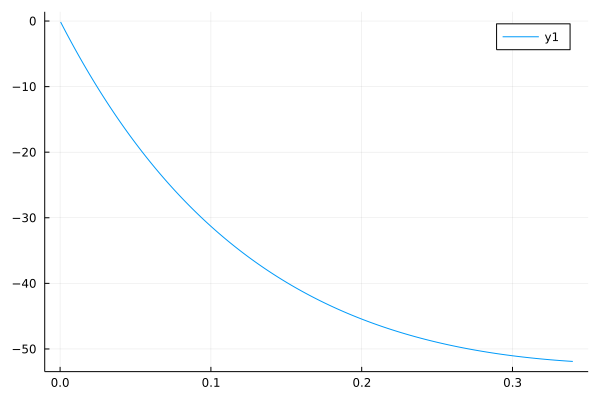

In [858]:

using Plots
f(x) = F([447.804015, 1.26421399, 3.009682, x , 4])[1]
g(x) =F([447.804015, 1.26421399, 3.009682, x, 4])[4]
h(x) =  F([447.804015, 1.26421399, 3.009682, x, 4])[10]
xs = LinRange(0.0,0.34,1000)
xs1 = LinRange(0.0,0.34,1000)
ys = f.(xs)
ys1 = g.(xs1)
ys2 = h.(xs1)
plot(xs,ys)


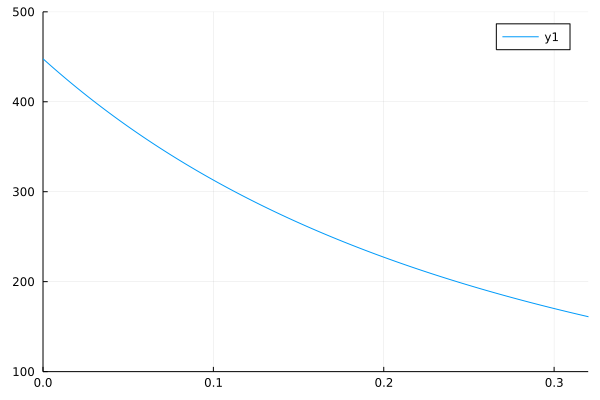

In [859]:
plot((xs1,ys1),ylims = (100, 500),xlims = (0,0.32))


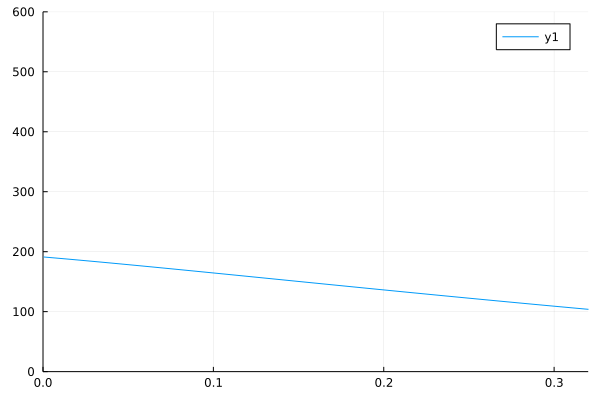

In [860]:
plot((xs1,ys2),ylims = (0,600),xlims = (0,0.32))

In [861]:
ys2

1000-element Vector{Float64}:
 NaN
 191.15543729792594
 191.07301953932793
 190.99051212990122
 190.90791547396057
 190.82522997444516
 190.7424560329235
 190.65959404959835
 190.57664442331165
 190.49360755154922
 190.41048383044597
 190.32727365479045
 190.2439774180295
   ⋮
  99.74769759389511
  99.66138527469165
  99.57510002652981
  99.48884186341759
  99.40261079930849
  99.31640684810147
  99.23023002364114
  99.14408033971802
  99.05795781006861
  98.97186244837566
  98.88579426826817
  98.79975328332185